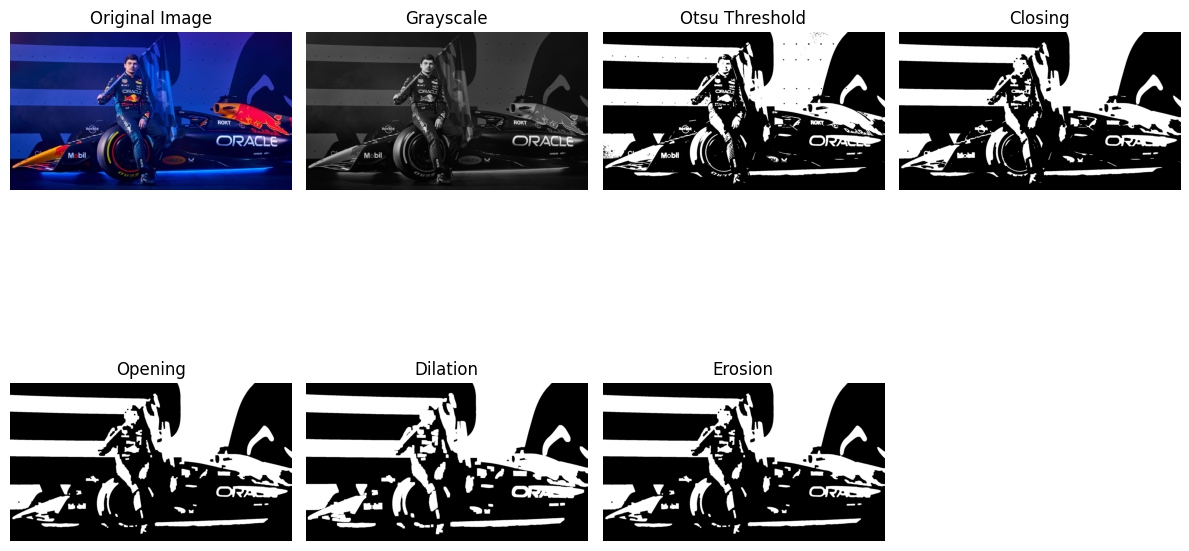

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read Image
img = cv2.imread('/content/dudududu.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian Blur (helps Otsu perform better by reducing noise)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Otsu Thresholding (Automatic threshold selection)
ret, otsu = cv2.threshold(
    blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Morphological Operations

# Kernel Definition (used for structure)
kernel = np.ones((5, 5), np.uint8)

# Closing: Dilation followed by Erosion – removes small black holes
closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel, iterations=2)

# Opening: Erosion followed by Dilation – removes small white noise
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)

# Dilation: Expands white areas
dilated = cv2.dilate(opening, kernel, iterations=2)

# Erosion: Shrinks white areas
eroded = cv2.erode(dilated, kernel, iterations=2)

# Step 5: Display Results
titles = ["Original Image", "Grayscale", "Otsu Threshold",
          "Closing", "Opening", "Dilation", "Erosion"]

images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), gray, otsu,
          closing, opening, dilated, eroded]

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(2, 4, i+1)
    cmap = 'gray' if i > 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()